<p style="text-align:center">
    <a href="https://www.theforage.com/virtual-internships/NkaC7knWtjSbi6aYv">
    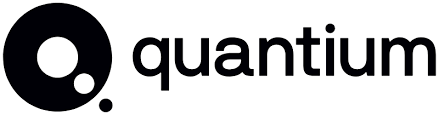
    </a>
</p>
<h1 align="center"><font size="5">Quantium Virtual Internship - Retail Strategy and Analytics</font></h1>

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 1px">
    <ul>
    <li><a href="https://#Section_1">Task 1: Data Preparation and Customer Analytics</a></li>
    <li><a href="https://#Section_2">Task 2: Experimentation and uplift testing</a></li>
    <li><a href="https://#Section_3">Task 3 </a></li>
</a></li>
</div>

<hr>

# Task 1: Data preparation and customer analytics

## 1.1. Background information

Quantium’s retail analytics team and have been approached by a client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

The insights from the analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

### Main tasks
- Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

- Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

- Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

- Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

### End goal
Form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure the insights can have a commercial application.

**Recommendation**: derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment

## 1.2. Import libraries and data

In [2]:
# install packages
pip install plotly

SyntaxError: invalid syntax (Temp/ipykernel_13508/3132758833.py, line 2)

In [4]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## changer notebook render
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'notebook' or 'colab' or 'jupyterlab'

# use regular expression
import re

import matplotlib as mpl
mpl.style.use(['ggplot'])
# plt.style.use("seaborn")
# use the inline backend to generate the plots within the browser
%matplotlib inline

In [5]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [19]:
# read data into pandas dataframe
customer_df = pd.read_csv("QVI_purchase_behaviour.csv")
transac_df = pd.read_excel("QVI_transaction_data.xlsx")

## 1.3. Exploratory data analysis

### 1.3.1. Examining transaction data

In [4]:
print(transac_df.info())
transac_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Check for outliers, missing values and duplicates

In [5]:
# summanry statistics
transac_df.describe(include="all")

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


<AxesSubplot:xlabel='TOT_SALES'>

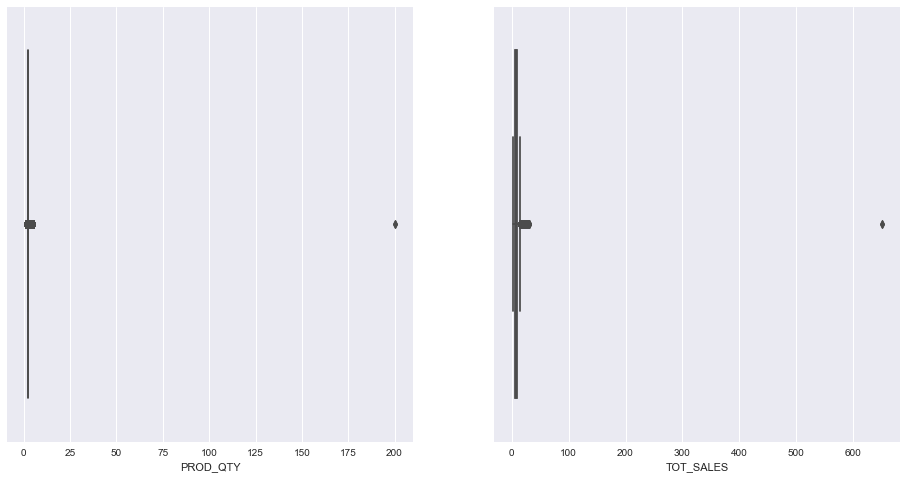

In [6]:
# Let's plot product quantity and total sales to see if there's any outliers
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
sns.boxplot(x="PROD_QTY", data=transac_df, ax=ax[0])
sns.boxplot(x="TOT_SALES", data=transac_df, ax=ax[1])

# ax[0].set_xlim(0, 25)
# ax[1].set_xlim(0, 100)

It seems like someone purchase 200 bags of chip in 1 transaction, let check that transaction

In [7]:
transac_df[transac_df["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There're only 2 observations with 200 bags of chips purchase by the same customer, let's see if the customer has had other transactions

In [8]:
transac_df[transac_df["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.


In [20]:
transac_df = transac_df[transac_df["LYLTY_CARD_NBR"] != 226000]

In [10]:
# There's no null values
transac_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [11]:
# Check for duplicates
print("Number of observation: ", len(transac_df))
print("Number of unique observation: ", len(transac_df.drop_duplicates()))

Number of observation:  264834
Number of unique observation:  264833


In [21]:
# There's 1 duplicates, let's drop it
transac_df.drop_duplicates(inplace=True)
len(transac_df)

264833

#### Date

Excel date in DATE column need to be change into datetime format.
Since Excel date is store as number of days from 1899-12-30, I will use `timedelta` as it is used for calculating differences in dates

In [22]:
transac_df["full_date_dt"] = transac_df["DATE"].map(lambda x: datetime(1899, 12, 30) + timedelta(days=x))

Or I could use `pd.to_datetime`

In [23]:
transac_df["full_date_pd"] = pd.to_datetime(transac_df['DATE'], unit='D', origin='1899-12-30')

In [15]:
print(transac_df.dtypes)
transac_df.head()

DATE                       int64
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
full_date_dt      datetime64[ns]
full_date_pd      datetime64[ns]
dtype: object


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,full_date_dt,full_date_pd
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,2018-08-18


In [16]:
print(transac_df["full_date_pd"].min())
print(transac_df["full_date_pd"].max())

2018-07-01 00:00:00
2019-06-30 00:00:00


In [17]:
transac_df["full_date_pd"].nunique()

364

The data range from 2018-07-01 to 2019-06-30 and there're 364 dates in the data which indicates a missing date. Let's find the missing date.

In [24]:
# Generate a list of dates with transactions in ascending order 
date_counts = transac_df.groupby('full_date_pd').size()

# Then compare to a full list of dates within the same range to find differences between them 
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(date_counts.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [26]:
transac_df = transac_df.append({"STORE_NBR": 0, 
                                "LYLTY_CARD_NBR": 0, 
                                "TXN_ID": 0, 
                                "PROD_NBR": 0, 
                                "PROD_NAME": "None", 
                                "BRAND_NAME": "None", 
                                "PROD_SIZE": "0g", 
                                "PROD_QTY": 0, 
                                "TOT_SALES": 0, 
                                "LIFESTAGE": "None", 
                                "PREMIUM_CUSTOMER": "None",
                               "full_date_pd": pd.to_datetime("2018-12-25")}, ignore_index=True)

sale_over_time = transac_df.groupby(["full_date_pd"]).agg({"TOT_SALES": "sum"}).reset_index()

In [27]:
sale_over_time

,full_date_pd,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
360,2019-06-26,5305.0
361,2019-06-27,5202.8
362,2019-06-28,5299.6
363,2019-06-29,5497.6


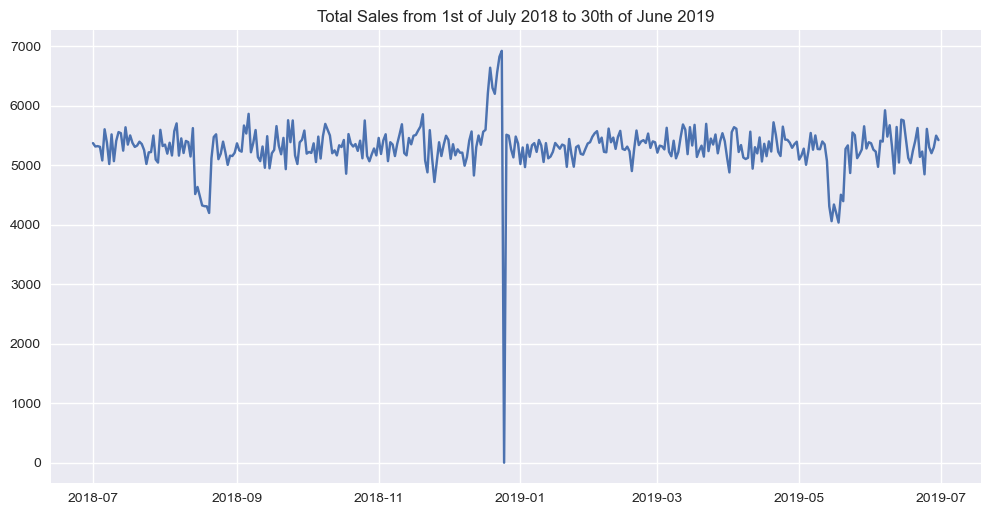

In [34]:
plt.figure(figsize=(12,6), dpi=100)
plt.plot(sale_over_time["full_date_pd"], sale_over_time["TOT_SALES"])
plt.title("Total Sales from 1st of July 2018 to 30th of June 2019")
plt.show()

We can see that sales increased a few days before Christmas period and as previously found, there was no sale on Christmas day. This maybe because the shops were closed on Christmas day. Sales plummeted in mid-August 2018 and mid-June 2019.

#### Product name

In [20]:
# remove '&', '/' and weights (digits follow with g) from PROD_NAME
prod_words = transac_df["PROD_NAME"].map(lambda x: re.sub('\d\w*', ' ', x))
prod_words = prod_words.map(lambda x: re.sub('[&/]', ' ', x))
prod_words

0           Natural Chip        Compny SeaSalt 
1                         CCs Nacho Cheese     
2           Smiths Crinkle Cut  Chips Chicken  
3           Smiths Chip Thinly  S Cream Onion  
4         Kettle Tortilla ChpsHny Jlpno Chili  
                          ...                  
264831     Kettle Sweet Chilli And Sour Cream  
264832               Tostitos Splash Of  Lime  
264833                    Doritos Mexicana     
264834     Doritos Corn Chip Mexican Jalapeno  
264835               Tostitos Splash Of  Lime  
Name: PROD_NAME, Length: 264833, dtype: object

In [21]:
# calculating the frequency of each words
word_counts = pd.Series(" ".join(prod_words).split()).value_counts()
word_counts[:20]

Chips       49770
Kettle      41288
Smiths      28859
Salt        27976
Cheese      27890
Pringles    25102
Doritos     24962
Crinkle     23960
Corn        22061
Original    21560
Cut         20753
Chip        18645
Chicken     18576
Salsa       18094
Cream       16926
Chilli      15390
Sea         14145
Thins       14075
Sour        13882
Crisps      12607
dtype: int64

There are salsa products in the dataset but we are only interested in the chips 
category => remove these

In [22]:
# remove product with salsa or Salsa in name
transac_df = transac_df[transac_df['PROD_NAME'].str.contains(r"[Ss]alsa") == False]
transac_df.shape

(246739, 10)

Creating new features from PROD_NAME such as Brand name and Package size

In [23]:
# Extract the pakage size by getting the digits in the string
transac_df['PACK_SIZE'] = transac_df['PROD_NAME'].str.extract("(\d+)")
transac_df['PACK_SIZE'] = pd.to_numeric(transac_df['PACK_SIZE'])

transac_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,full_date_dt,full_date_pd,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,2018-10-17,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,2019-05-14,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,2019-05-20,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,2018-08-17,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,2018-08-18,150


Text(0, 0.5, 'Quantity')

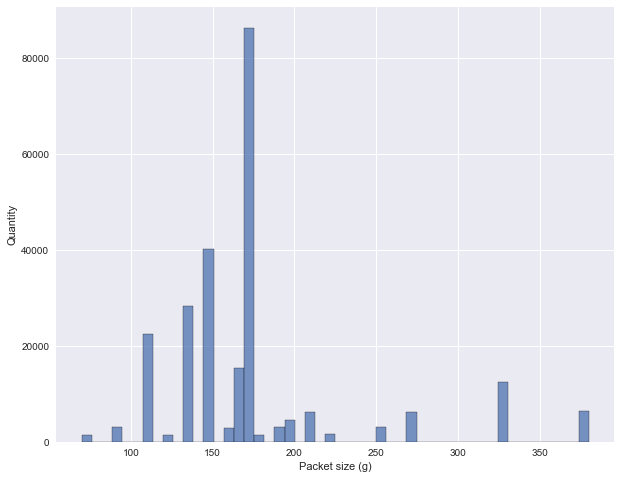

In [24]:
plt.figure(figsize=(10,8))
sns.histplot(data=transac_df, x='PACK_SIZE', bins=50)
plt.xlabel('Packet size (g)')
plt.ylabel('Quantity')

In [28]:
print("Min Package size: ",transac_df['PACK_SIZE'].min(),"g")
print("Max Package size:", transac_df['PACK_SIZE'].max(),"g")

Min Package size:  70 g
Max Package size: 380 g


In [30]:
# Get the Brand name by getting the 1st word after split
transac_df['BRAND'] = transac_df['PROD_NAME'].str.split().str[0]

In [34]:
np.sort(transac_df['BRAND'].unique())

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

Some brand names look like they are of the same brand, let's combine them.

In [51]:
dup_names ={'Dorito':'Doritos', 'Grain':'Grain Wave', 'GrnWves':'Grain Wave',
           'Infzns':'Infuzions','NCC':'Natural Chip Co', 'Natural':'Natural Chip Co',
           'RRD':'Red Rock Deli', 'Red':'Red Rock Deli', 'Smith':'Smiths',
           'Snbts':'Sunbites', 'WW':'Woolworths'           
}

transac_df.replace({'BRAND':dup_names}, inplace=True)
np.sort(transac_df['BRAND'].unique())

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'Grain Wave', 'Infuzions', 'Kettle', 'Natural Chip Co',
       'Pringles', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths'], dtype=object)

Let's get the product name without the brand and package size


### 1.3.2. Examining customer data

In [7]:
print(customer_df.info())
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


#### Check for outliers, missing values and duplicates

In [52]:
customer_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There's no missing values, let's check if there's any duplicates.

In [55]:
customer_df.duplicated().sum()

0

There's also no duplicates values. Since there's 1 ID columns and 2 categorical columns, checking outliers isn't neccessary for customer dataframe. Let's move on to examine the catergorical data.

#### Customer's lifestage and Customer's type

In [11]:
print("Customer's lifestage")
print(customer_df.LIFESTAGE.value_counts())

Customer's lifestage
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


In [ ]:
print("Customer's type")
print(customer_df.PREMIUM_CUSTOMER.value_counts())

Customer's type
Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


It seems like most of the customer are retire or not a familes. Maybe Families opted for other food that's not chips.

### 1.3.3. Combine customer and transaction data

In [89]:
combined_df = pd.merge(transac_df.drop(['DATE', 'TXN_ID', 'full_date_dt'], axis=1),
                      customer_df, on='LYLTY_CARD_NBR', how='left')
combined_df.info()
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246739 entries, 0 to 246738
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   STORE_NBR         246739 non-null  int64         
 1   LYLTY_CARD_NBR    246739 non-null  int64         
 2   PROD_NBR          246739 non-null  int64         
 3   PROD_NAME         246739 non-null  object        
 4   PROD_QTY          246739 non-null  int64         
 5   TOT_SALES         246739 non-null  float64       
 6   full_date_pd      246739 non-null  datetime64[ns]
 7   PACK_SIZE         246739 non-null  int64         
 8   BRAND             246739 non-null  object        
 9   LIFESTAGE         246739 non-null  object        
 10  PREMIUM_CUSTOMER  246739 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 22.6+ MB


,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,full_date_pd,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,1,1307,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,1,1343,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2,2373,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2,2426,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [90]:
combined_df.rename(columns={'full_date_pd':'DATES'}, inplace=True)
combined_df.head()

,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,1,1307,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,1,1343,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2,2373,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2,2426,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


See if any transactions did not have a matched customer

In [5]:
combined_df.isnull().sum()

STORE_NBR           0
LYLTY_CARD_NBR      0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
DATES               0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

In [91]:
# export the data
combined_df.to_csv("QVI_data.csv", index=False)

## 1.4. Data analysis on customer segments

In [6]:
df = pd.read_csv("QVI_data.csv")
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246739 entries, 0 to 246738
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STORE_NBR         246739 non-null  int64  
 1   LYLTY_CARD_NBR    246739 non-null  int64  
 2   PROD_NBR          246739 non-null  int64  
 3   PROD_NAME         246739 non-null  object 
 4   PROD_QTY          246739 non-null  int64  
 5   TOT_SALES         246739 non-null  float64
 6   DATES             246739 non-null  object 
 7   PACK_SIZE         246739 non-null  int64  
 8   BRAND             246739 non-null  object 
 9   LIFESTAGE         246739 non-null  object 
 10  PREMIUM_CUSTOMER  246739 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 20.7+ MB


,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,1,1307,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,1,1343,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2,2373,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2,2426,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [7]:
# fix the date format
df['DATES'] = pd.to_datetime(df['DATES'])
df.dtypes

STORE_NBR                    int64
LYLTY_CARD_NBR               int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
DATES               datetime64[ns]
PACK_SIZE                    int64
BRAND                       object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

Let's create a dataframe to see the relationship between customer lifesatge, premium type, and sales. I would like to answer a few questions:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What’s the average chip price by customer segment

In [8]:
df_customer = df.groupby([
    'LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum'}).reset_index()
df_customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2.7
2,1003,YOUNG FAMILIES,Budget,6.6
3,1004,OLDER SINGLES/COUPLES,Mainstream,1.9
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,2.8


In [9]:
df_segment = df_customer.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({'TOT_SALES':'sum'}).reset_index()
df_segment.sort_values(by='TOT_SALES', ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123531.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


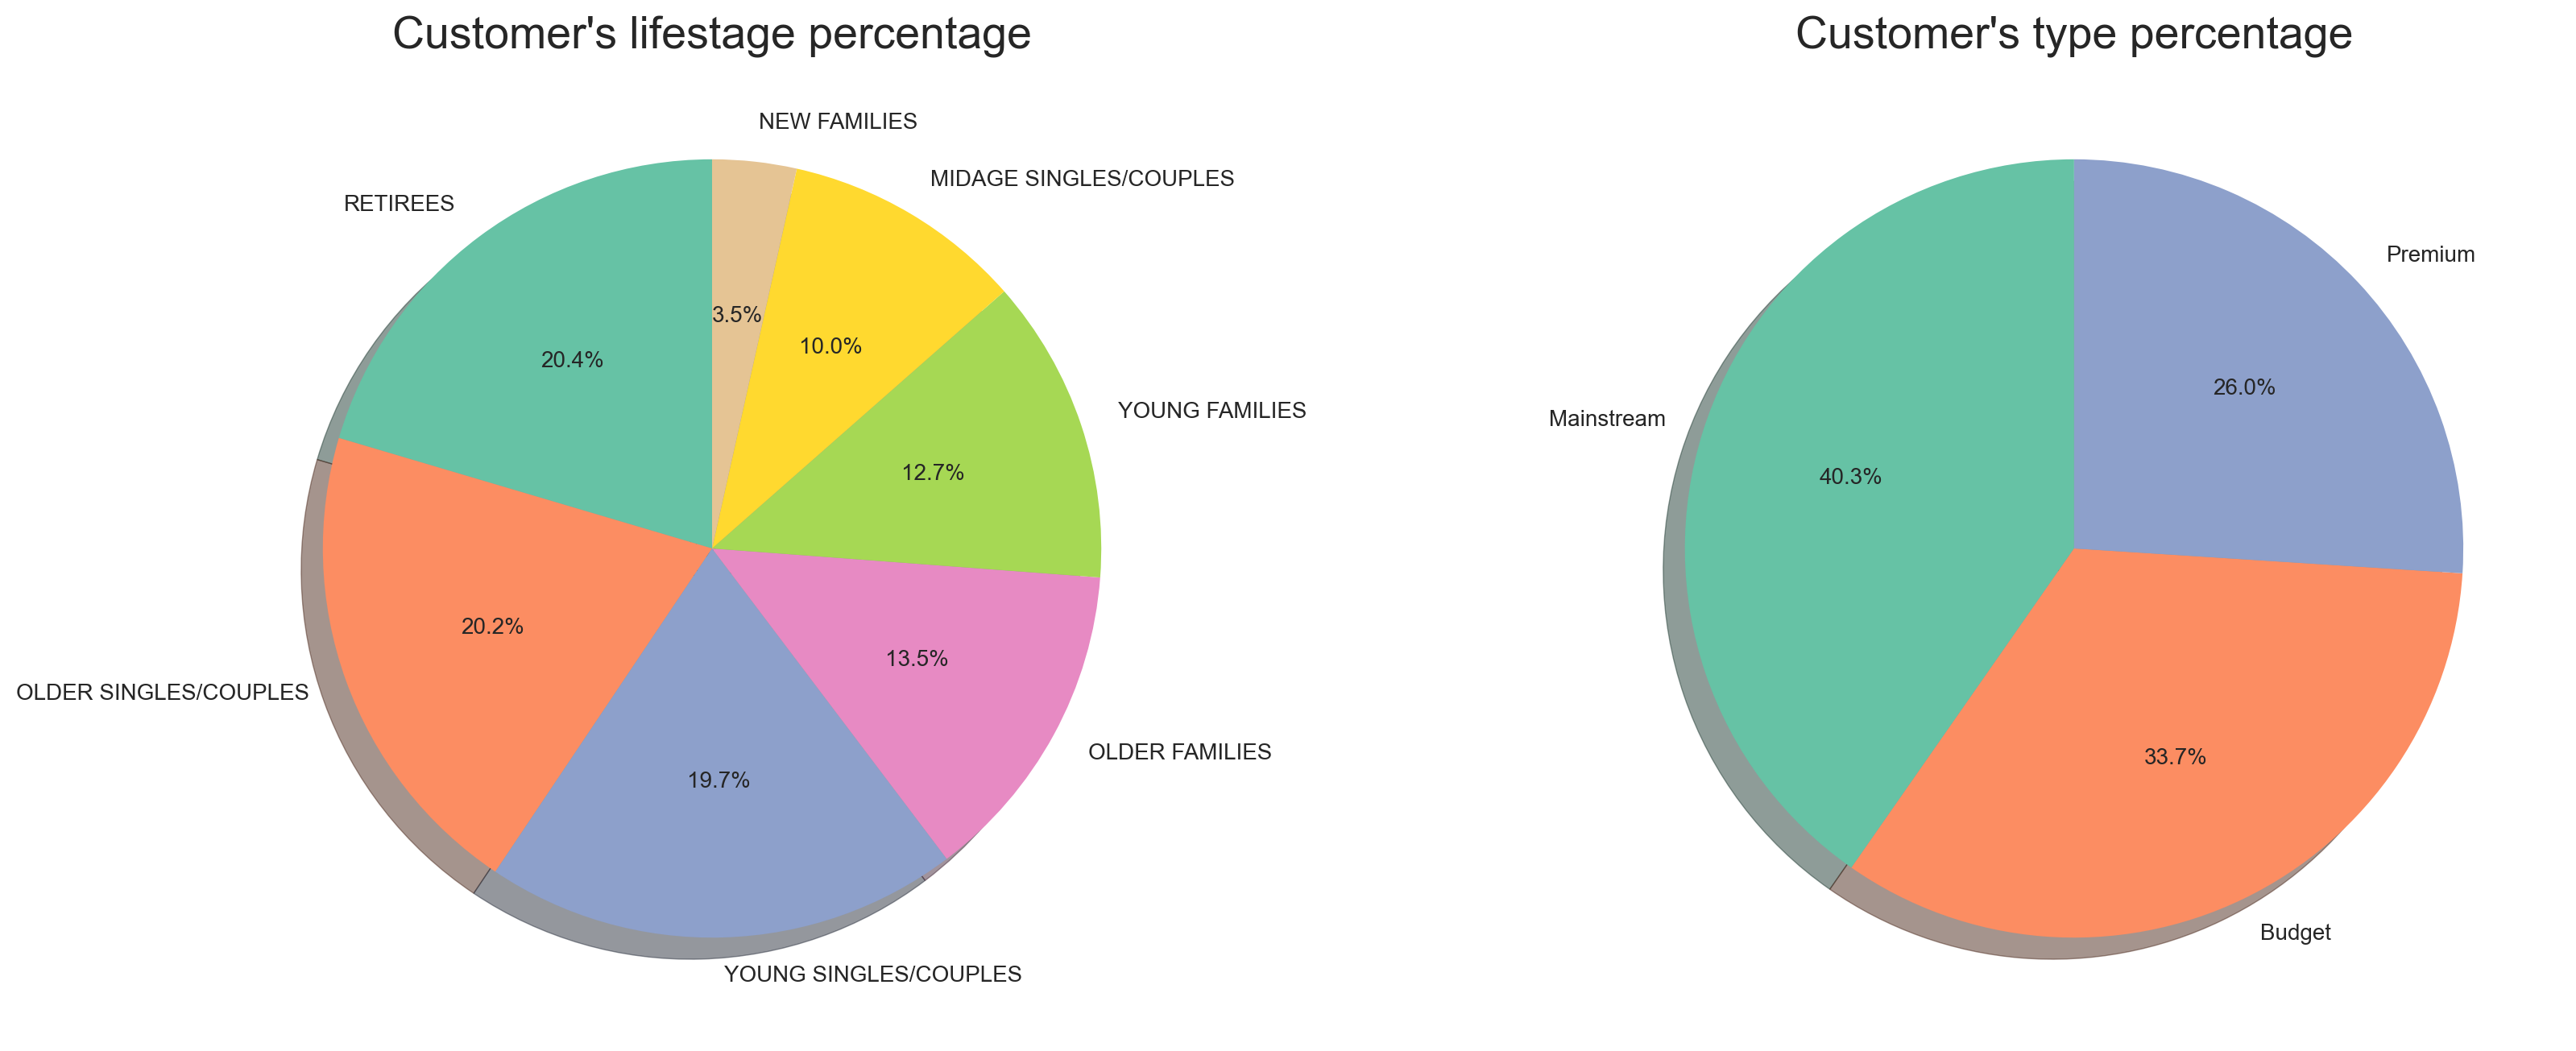

In [10]:
# get the data for pie charts
labels_life = df_customer.LIFESTAGE.value_counts().index
values_life = df_customer.LIFESTAGE.value_counts().values
labels_type = df_customer.PREMIUM_CUSTOMER.value_counts().index
values_type = df_customer.PREMIUM_CUSTOMER.value_counts().values

# plotting
fig, ax = plt.subplots(ncols=2, figsize=(20,8), dpi=200)
palette_color = sns.color_palette("Set2")

ax[0].pie(values_life, labels=labels_life, autopct='%1.1f%%', colors=palette_color, startangle=90,shadow=True)
ax[1].pie(values_type, labels=labels_type, autopct='%1.1f%%', colors=palette_color, startangle=90, shadow=True)

ax[0].set_title("Customer's lifestage percentage", fontsize = 20)
ax[1].set_title("Customer's type percentage", fontsize = 20)

plt.show()

From the customer lifestage pie chart, it can be seen that around 40 of the customer are SINGLES/COUPLES, i assumed this group doesn't have children. FAMILIES group accounted for around 30% and the RETIREES takes up 20%.

40% of customer is of mainstream type, 33% of budget type and 27% of premium type.

Let's check if there any correlation between LIFESTAGE, PREMIUM type and TOT_SALES

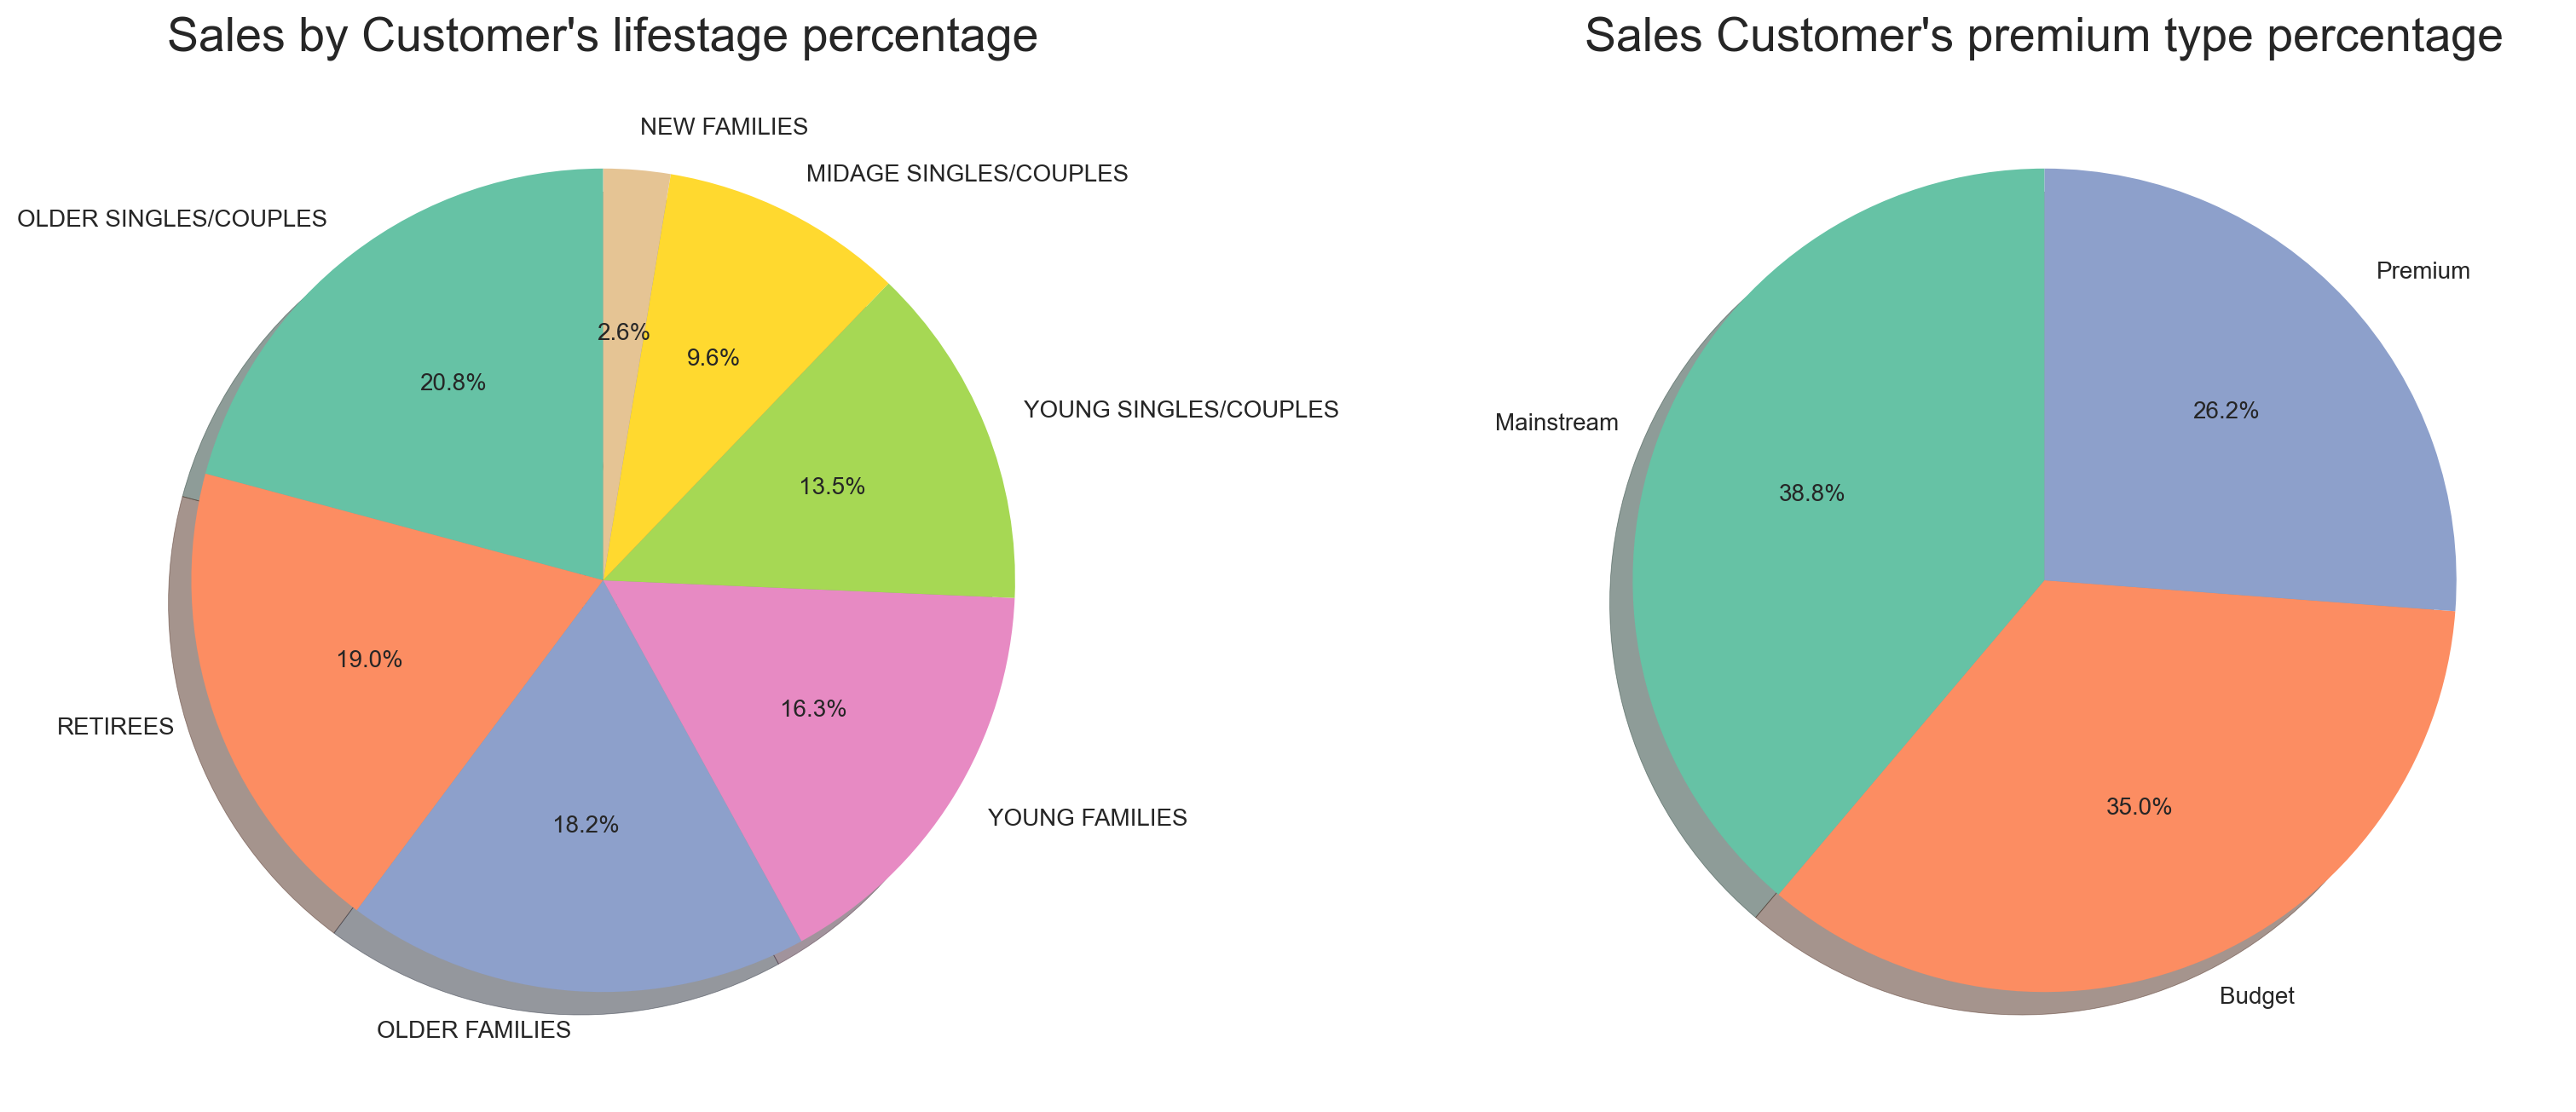

In [62]:
# get the data for pie charts
lifestage = df_customer.groupby(['LIFESTAGE']).agg({'TOT_SALES':'sum'}).sort_values('TOT_SALES', ascending=False)
premium = df_customer.groupby(['PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum'}).sort_values('TOT_SALES', ascending=False)

labels_life = lifestage.index
values_life = lifestage.TOT_SALES.values
labels_type = premium.index
values_type = premium.TOT_SALES.values

# plotting
fig, ax = plt.subplots(ncols=2, figsize=(20,8), dpi=200)
palette_color = sns.color_palette("Set2")

ax[0].pie(values_life, labels=labels_life, autopct='%1.1f%%', colors=palette_color, startangle=90,shadow=True)
ax[1].pie(values_type, labels=labels_type, autopct='%1.1f%%', colors=palette_color, startangle=90, shadow=True)

ax[0].set_title("Sales by Customer's lifestage percentage", fontsize = 20)
ax[1].set_title("Sales Customer's premium type percentage", fontsize = 20)

plt.show()

Older families tends to by more chips than younger ones.

There's quite a correlation between the number of customer for each categories and the total of sales.

In [11]:
life_sale = df_customer.groupby(['LIFESTAGE']).agg({'TOT_SALES':['sum', 'count','mean']}).reset_index()
life_sale.columns = ['LIFESTAGE', 'Total Sales', 'Number of customers', 'Average sales per customer']
life_sale

,LIFESTAGE,Total Sales,Number of customers,Average sales per customer
0,MIDAGE SINGLES/COUPLES,172523.80,7141,24.159613
1,NEW FAMILIES,47347.95,2492,18.999980
2,OLDER FAMILIES,328519.90,9630,34.114216
3,OLDER SINGLES/COUPLES,376013.65,14389,26.132021
4,RETIREES,342381.90,14555,23.523318
5,YOUNG FAMILIES,294627.90,9036,32.606009
6,YOUNG SINGLES/COUPLES,243756.60,14044,17.356636


The OLDER FAMILIES has the highest and NEW FAMILIES have the highest and lowest sales per customer respectively.

<AxesSubplot:xlabel='Number of customers', ylabel='Total Sales'>

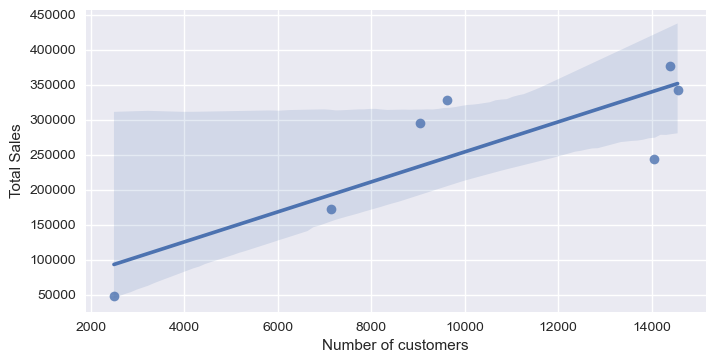

In [83]:
plt.figure(figsize=(8,4), dpi=100)
sns.regplot(x='Number of customers', y='Total Sales', data=life_sale)

In [12]:
fig = px.treemap(df_segment, path=['LIFESTAGE', 'PREMIUM_CUSTOMER'], values='TOT_SALES')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

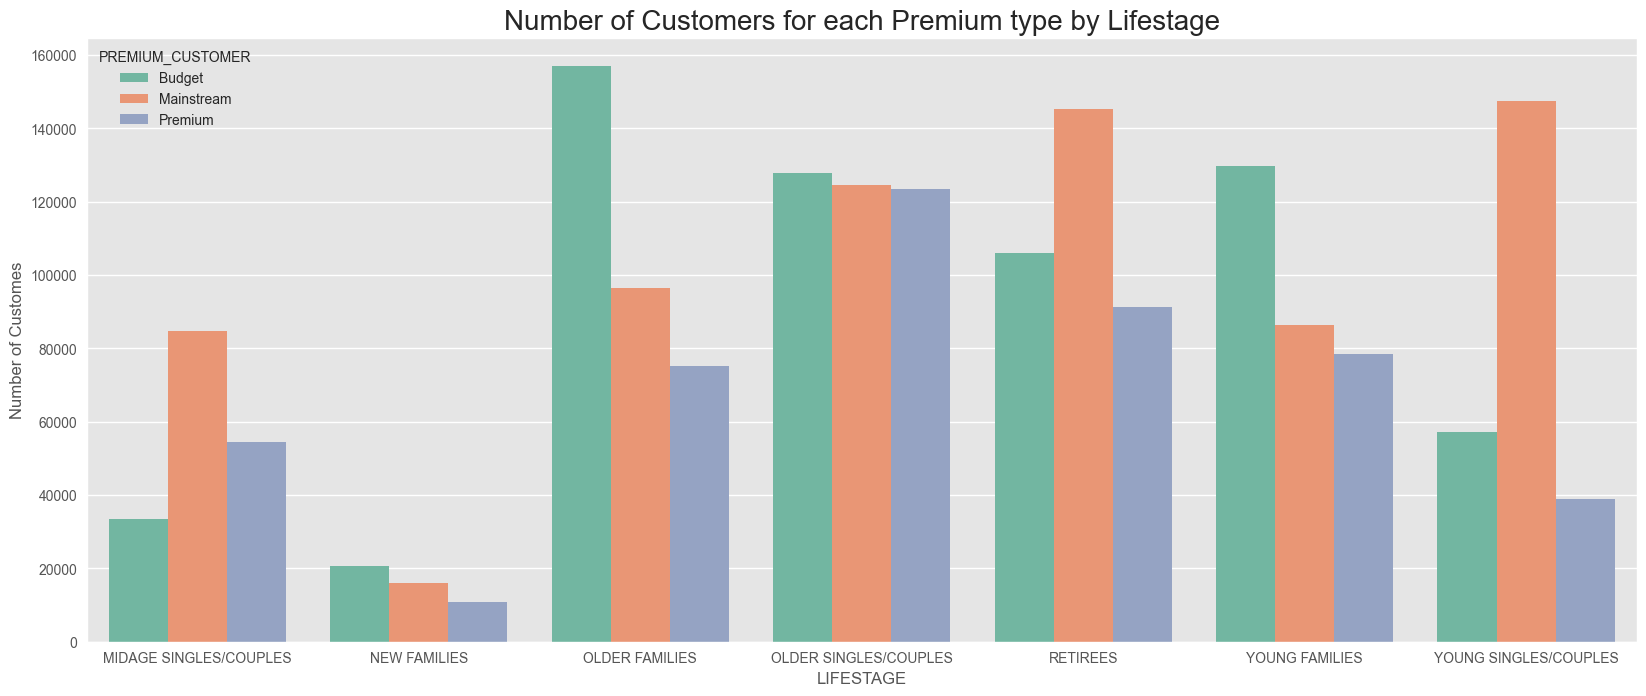

In [15]:
plt.figure(figsize=(20,8), dpi=100)
sns.barplot(data= df_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='Set2')
plt.title("Number of Customers for each Premium type by Lifestage", fontsize=20)
plt.ylabel("Number of Customes")
plt.show()

For the YOUNG SINGLES/COUPLES, MIDAGE SINGLES/COUPLES and RETIREES, Mainstream type is the majority. YOUNG FAMILIES AND OLDER FAMILIES seemed to prefer to be on budget. OLDER SINGLES/COUPLES have pretty the same sales regardless of member type. 

Budget Older Families, Mainstream Retirees, Mainstream Young Singles/Couples are 3 group with the most sales. 

In [92]:
df_seg_avg = df_customer.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({'TOT_SALES':'mean'}).reset_index()
df_seg_avg.sort_values(by='TOT_SALES', ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
7,OLDER FAMILIES,Mainstream,34.581618
6,OLDER FAMILIES,Budget,34.019464
8,OLDER FAMILIES,Premium,33.725952
15,YOUNG FAMILIES,Budget,32.815065
17,YOUNG FAMILIES,Premium,32.765513
16,YOUNG FAMILIES,Mainstream,32.155773
11,OLDER SINGLES/COUPLES,Premium,26.384355
9,OLDER SINGLES/COUPLES,Budget,26.362879
1,MIDAGE SINGLES/COUPLES,Mainstream,25.692617
10,OLDER SINGLES/COUPLES,Mainstream,25.658399


Older Families and Young Families are likely to spend more on each transactions.

Now let's dive into the brand and package size preference of the customers

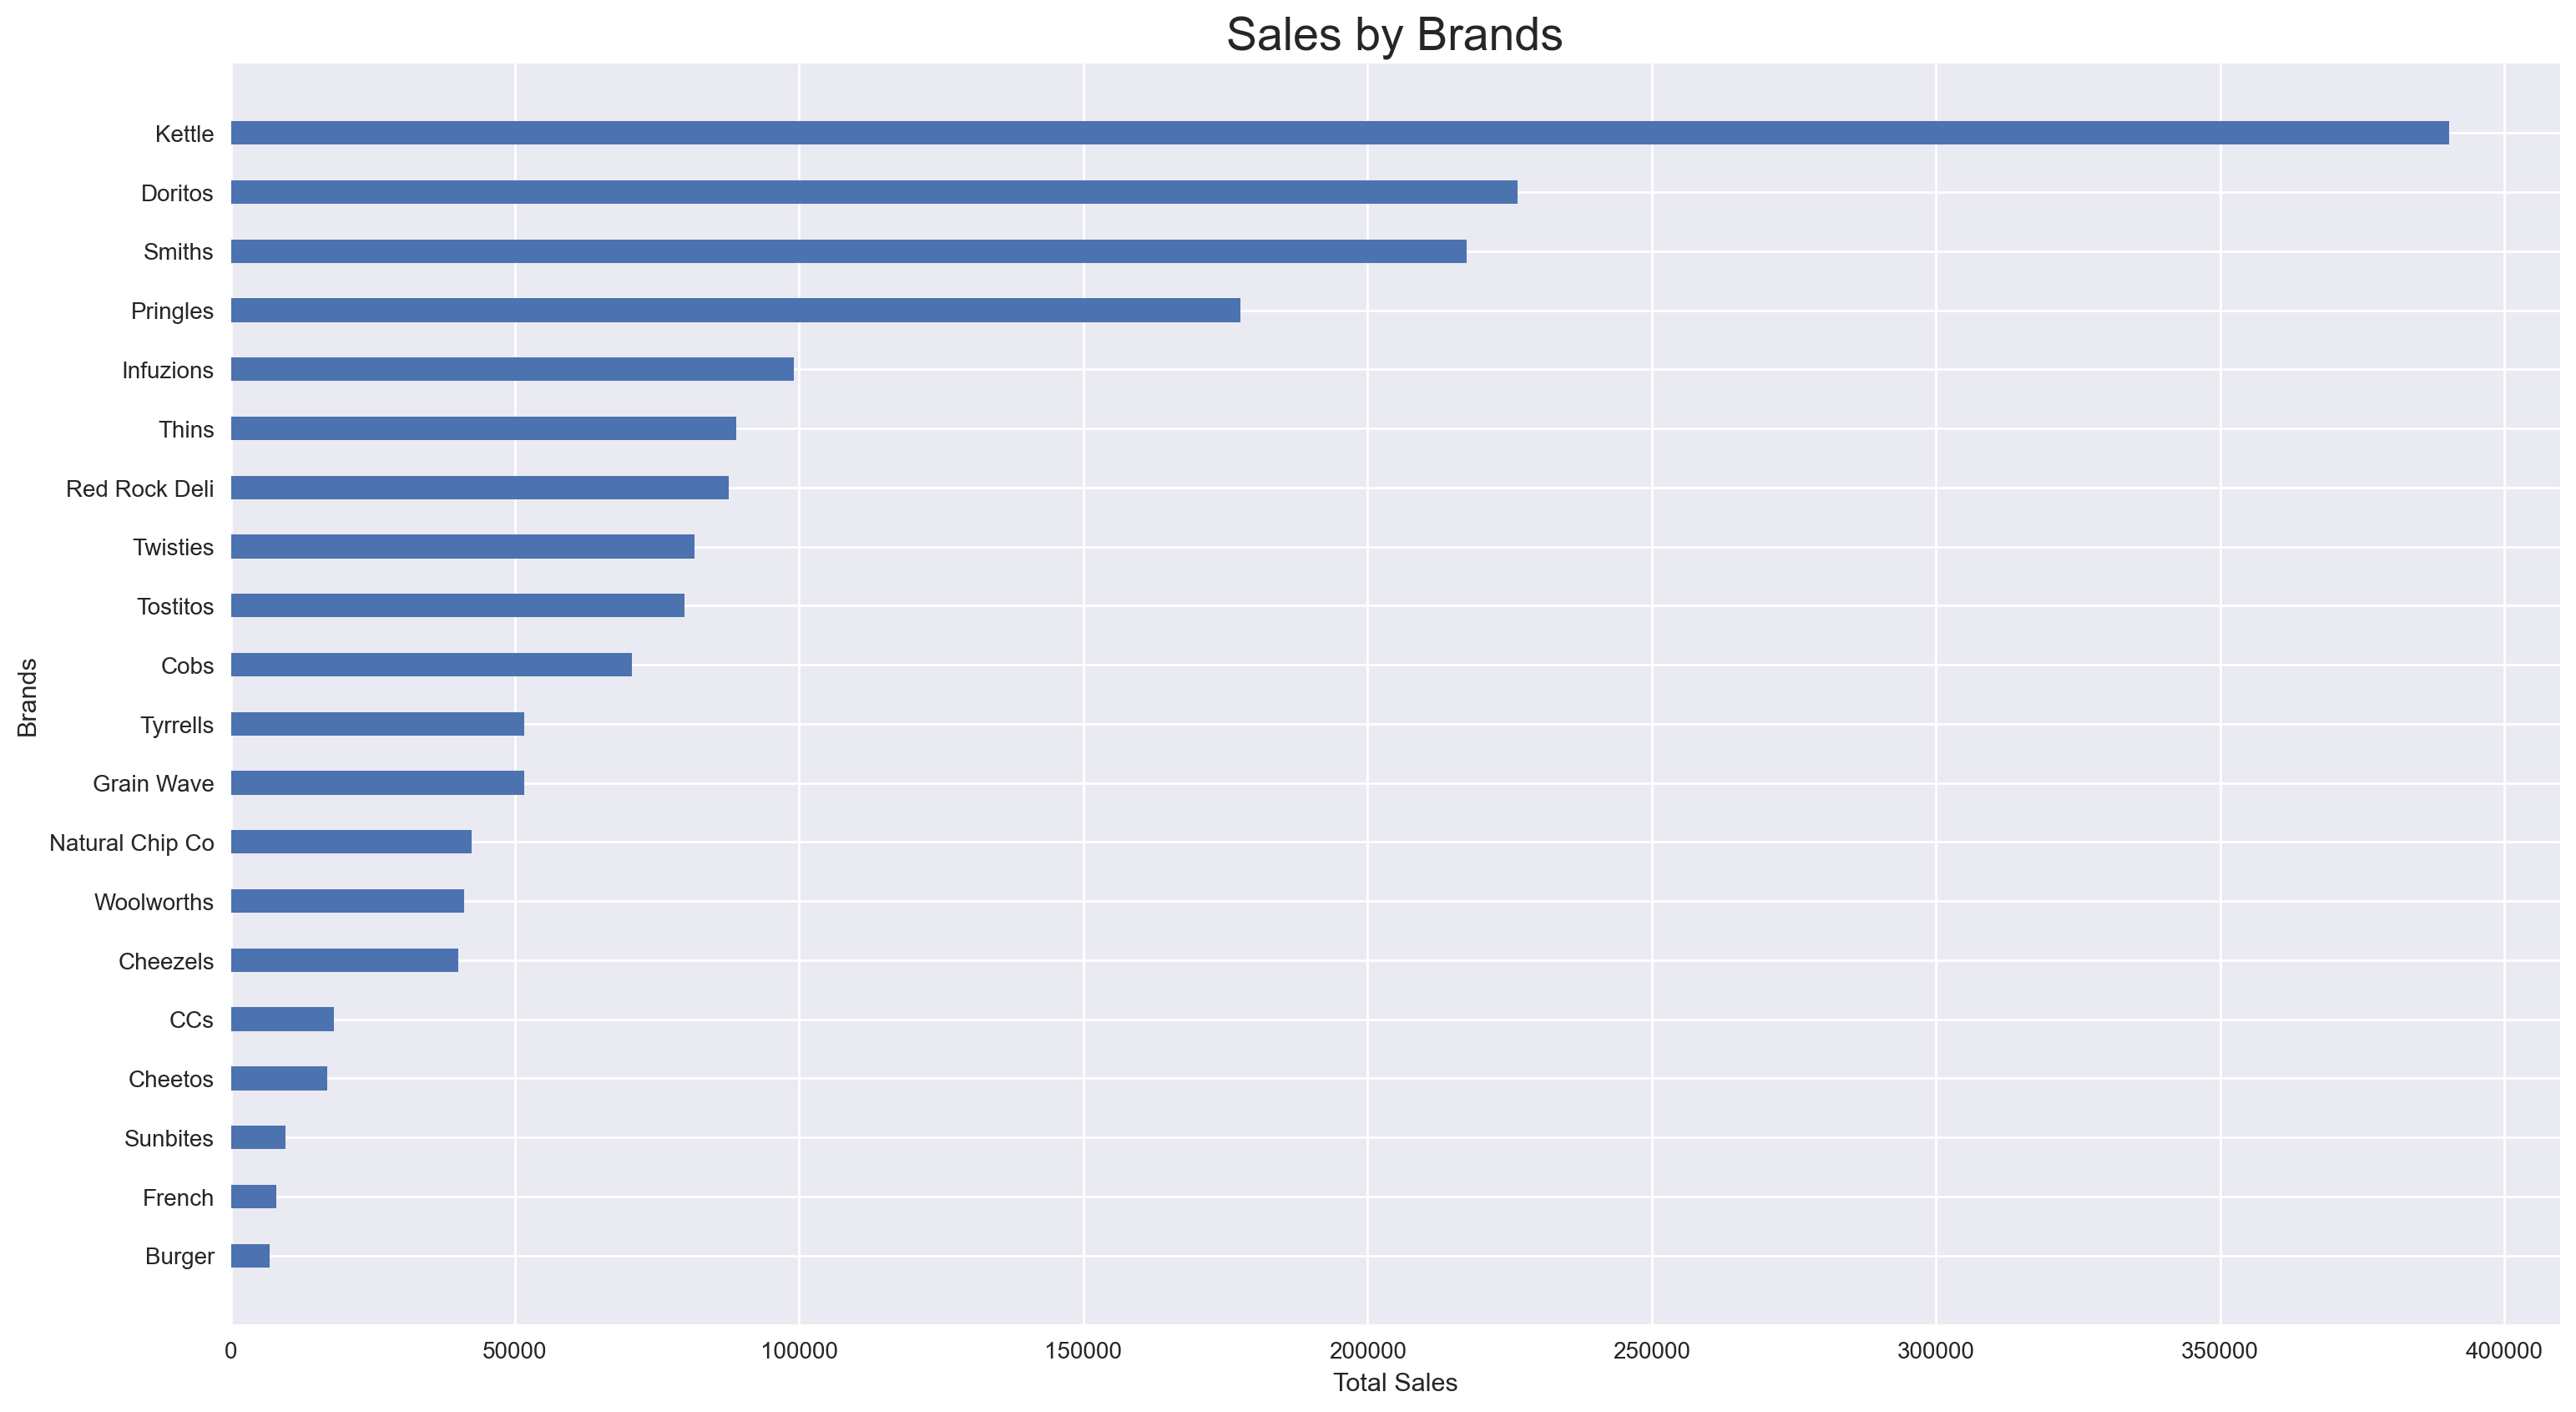

In [86]:
df_brand = df.groupby(['BRAND']).agg({'TOT_SALES':'sum'}).reset_index().sort_values(by='TOT_SALES')
plt.figure(figsize=(18,10), dpi=200)
ax = plt.barh(df_brand['BRAND'], df_brand['TOT_SALES'], height=0.4)
    
plt.title("Sales by Brands", fontsize=20)
plt.xlabel("Total Sales")
plt.ylabel("Brands")
plt.show()

Kettle wins by a big margin as customer's favorites chips. Doritos, Smiths and Pringles also had good sales. The company maybe shoudl concentrate more on these product and drop other low-sale one such as Burger, French, Sunbites, Cheetos and CCs.

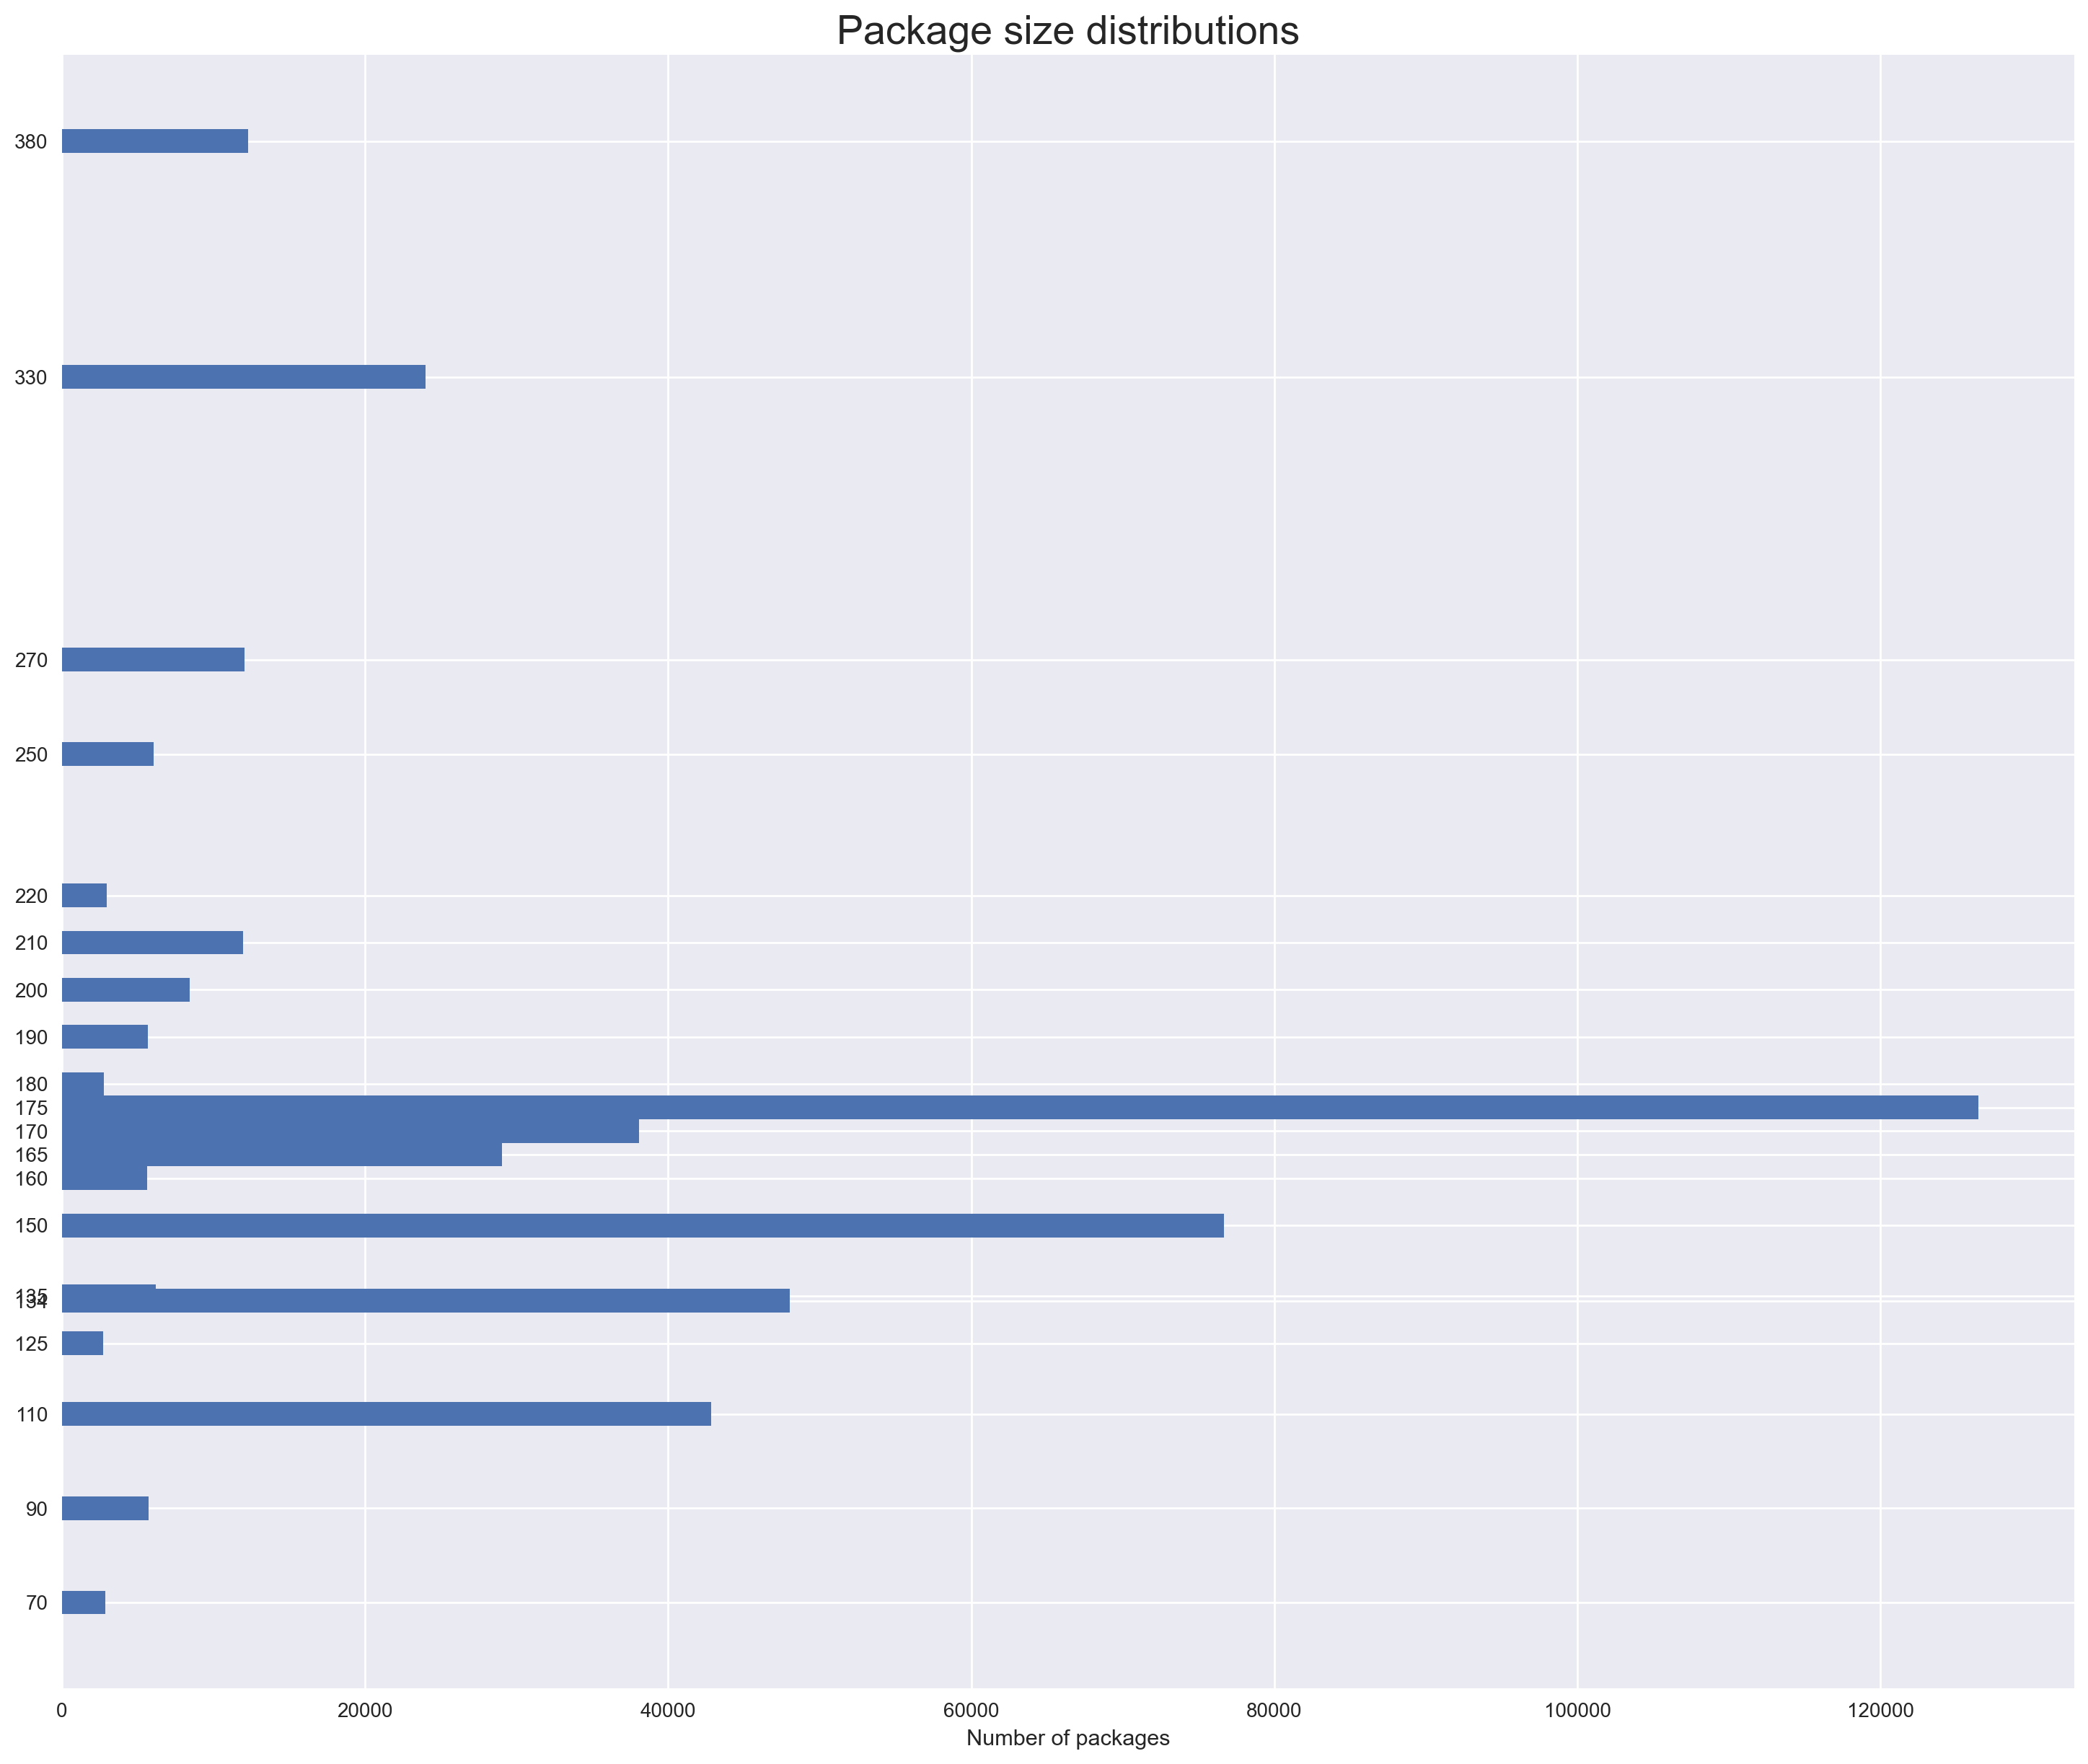

In [90]:
df_size = df.groupby(['PACK_SIZE']).agg({'PROD_QTY':'sum'}).reset_index().sort_values(by='PROD_QTY')
plt.figure(figsize=(18,15), dpi=200)
plt.barh(df_size['PACK_SIZE'], df_size['PROD_QTY'], height=5)
plt.title("Package size distributions", fontsize=20)
plt.yticks(df_size['PACK_SIZE'])
plt.xlabel("Number of packages")
plt.show()

The customers seemed to prefer smaller package size from 110-175g which is also the size of the favorite Kettle brand. Package size maybe isn't a big of an influence as brand

In [83]:
df[df['BRAND'].isin(['Doritos', 'Smiths', 'Pringles','Kettle'])][['BRAND','PACK_SIZE']].drop_duplicates().sort_values(by='BRAND')

,BRAND,PACK_SIZE
7,Doritos,150
34,Doritos,170
38,Doritos,380
327,Doritos,330
4,Kettle,150
22,Kettle,175
60,Kettle,135
28,Pringles,134
2,Smiths,170
3,Smiths,175


## 1.5. Summary

- OLDER and RETIREES customers take up the most sales. Budget Older Families, Mainstream Retirees, Mainstream Young Singles/Couples are 3 group with the most sales.
- Older Families and Young Families are likely to spend more on each transactions.
- Kettle is the favorite among customers. Doritos, Smiths and Pringles are also generate good sales.
- Package sizes of 110g to 175g take up a large proportion of sales but this maybe due to the size of favorite brand offered.